In [1]:
%run research_template.ipynb

In [2]:
import re
plt.rcParams["figure.figsize"] = [15,5]
sns.set_theme()

In [3]:
# data pre-processed in different notebook
kirsh_ret_df = pd.read_pickle('kirsh_ret_df_1999_to_2021.pkl')

In [67]:
kirsh_ret_df

,start_date,end_date,period_ret,cum_ret
0,1999-12-31,2000-01-31,-0.0146,-0.0146
1,2000-01-31,2000-02-29,0.1225,0.1062
2,2000-02-29,2000-03-31,-0.0041,0.1016
3,2000-03-31,2000-04-30,-0.0534,0.0428
4,2000-04-30,2000-05-31,-0.0507,-0.0101
...,...,...,...,...
254,2021-07-31,2021-08-31,0.0267,2.7830
255,2021-08-31,2021-09-30,-0.0482,2.6005
256,2021-09-30,2021-10-31,0.0767,2.8766
257,2021-10-31,2021-11-30,0.0091,2.9118


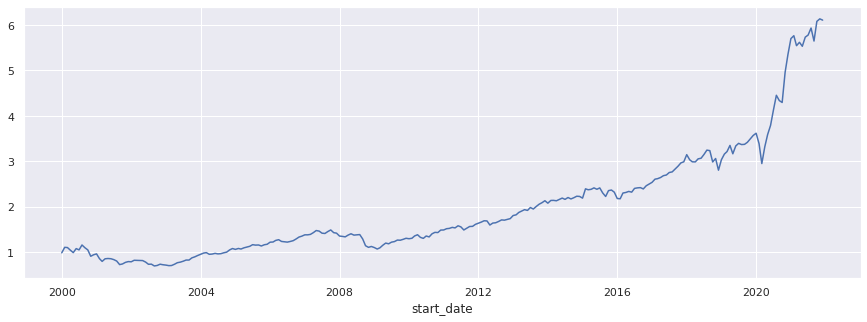

In [4]:
kirsh_ret_df.set_index('start_date', drop=False).period_ret.add(1).cumprod().plot();

In [15]:
kirsh_start_date = kirsh_ret_df.start_date[0]
kirsh_end_date = kirsh_ret_df.end_date.iloc[-1]

In [16]:
async with AnalysisCore.DAILY_OHLC_REPO as daily_repo:
    spy_ret = await daily_repo.get_ohlc_async('SPY', kirsh_start_date, kirsh_end_date)

In [17]:
spy_daily_ret_df = pd.DataFrame(
    [(s[0], float(s[4])) for s in spy_ret],
    columns=['date', 'close']
)

In [18]:
spy_monthly_ret = spy_daily_ret_df.set_index('date')
spy_monthly_ret.index = pd.DatetimeIndex(spy_monthly_ret.index)
spy_monthly_ret = spy_monthly_ret.pct_change().add(1).resample('1M').prod().sub(1)
spy_monthly_ret.columns = ['spy_month_ret']

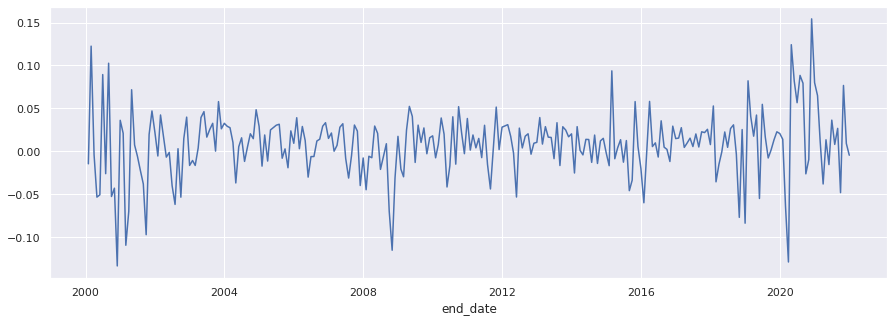

In [19]:
kirsh_ret_df.set_index('end_date').period_ret.plot();

In [20]:
spy_monthly_ret

,spy_month_ret
date,
2000-01-31,-0.030941
2000-02-29,-0.017738
2000-03-31,0.086230
2000-04-30,-0.022028
2000-05-31,-0.011900
...,...
2021-03-31,0.041987
2021-04-30,0.052910
2021-05-31,0.006566


In [21]:
both_ret_df = kirsh_ret_df.set_index('end_date').join(spy_monthly_ret)[['period_ret', 'spy_month_ret']].dropna()
both_ret_df.columns = ['kirsh', 'spy']

In [22]:
both_ret_df

,kirsh,spy
end_date,,
2000-01-31,-0.0146,-0.030941
2000-02-29,0.1225,-0.017738
2000-03-31,-0.0041,0.086230
2000-04-30,-0.0534,-0.022028
2000-05-31,-0.0507,-0.011900
...,...,...
2021-03-31,-0.0381,0.041987
2021-04-30,0.0134,0.052910
2021-05-31,-0.0155,0.006566


In [23]:
def plot_return_series_for_year(year):
    both_ret_df[str(year):str(year+1)].add(1).cumprod().plot()
    
def get_return_series_for_year(year):
    return both_ret_df[str(year):str(year+1)].add(1).cumprod().iloc[-1]

In [24]:
pd.DataFrame([get_return_series_for_year(i) for i in range(2000, 2021+1)])

,kirsh,spy
2001-12-31,0.792421,0.785905
2002-12-31,0.767013,0.667677
2003-12-31,1.168968,0.966525
2004-12-31,1.493830,1.369942
2005-12-31,1.267183,1.074784
2006-12-31,1.252619,1.125486
2007-12-31,1.208238,1.174283
2008-12-31,0.831973,0.648411
2009-12-31,0.920595,0.775603
2010-12-31,1.320851,1.393506


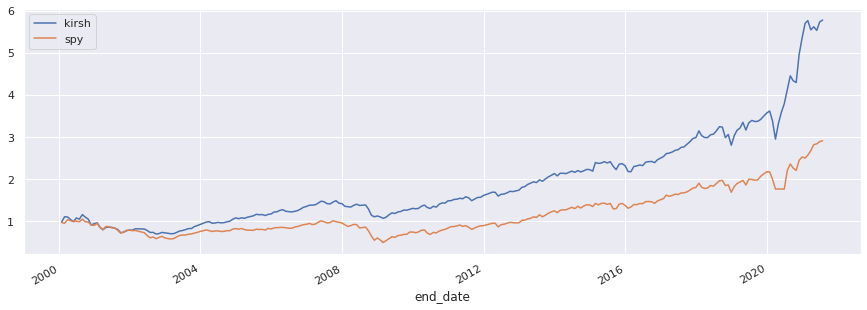

In [25]:
both_ret_df.add(1).cumprod().plot();

In [26]:
both_ret_df['2020':].add(1).cumprod().sub(1).iloc[-1]

kirsh    0.619610
spy      0.338843
Name: 2021-07-31 00:00:00, dtype: float64

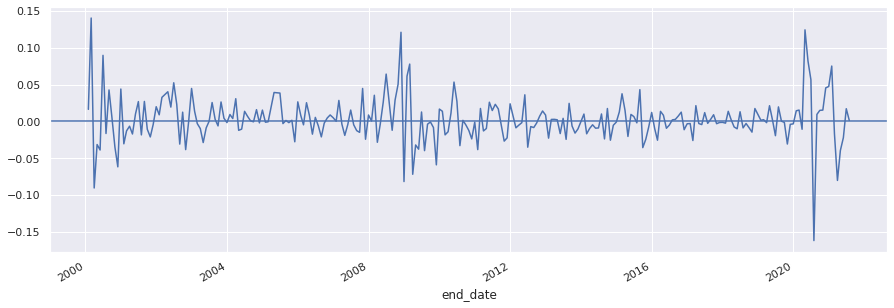

In [27]:
ret_diff_series = both_ret_df['kirsh'] - both_ret_df['spy']
ret_diff_series.plot()
plt.axhline(0);

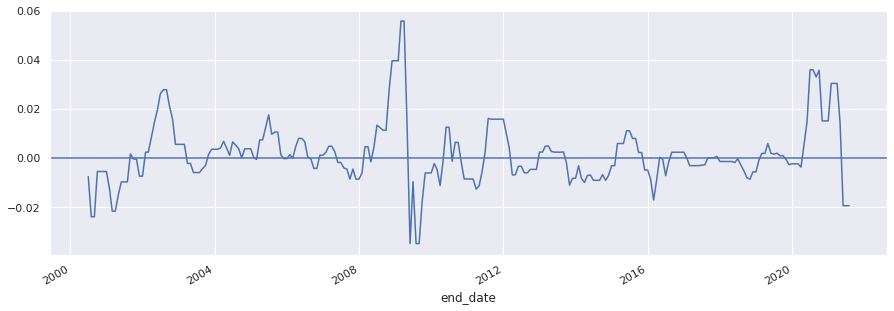

In [28]:
ret_diff_series.rolling(6).median().plot()
plt.axhline(0);

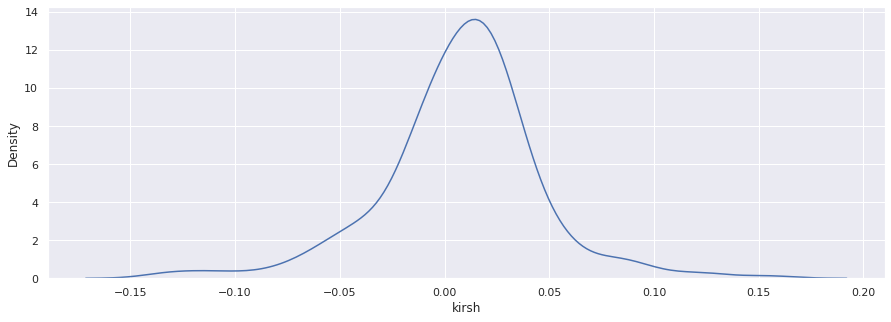

In [30]:
sns.kdeplot(both_ret_df['kirsh']);

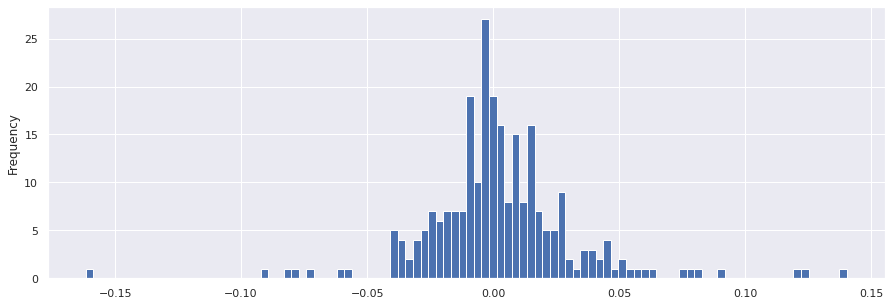

In [31]:
ret_diff_series.plot.hist(bins=100);

In [32]:
ret_diff_series.values

array([ 1.63411259e-02,  1.40238359e-01, -9.03302483e-02, -3.13717373e-02,
       -3.88002975e-02,  8.96147097e-02, -1.64201582e-02,  4.26521286e-02,
        5.49672131e-03, -3.49498695e-02, -6.16544231e-02,  4.38999498e-02,
       -3.03959028e-02, -1.28567752e-02, -6.51685393e-03, -1.70822436e-02,
        9.91869343e-03,  2.68889687e-02, -1.83032626e-02,  2.70871264e-02,
       -1.06472186e-02, -2.10636616e-02, -4.05520229e-03,  1.99079790e-02,
        8.93569554e-03,  3.26240124e-02,  4.02454744e-02,  1.93997619e-02,
        5.23990647e-02,  2.31252499e-02, -3.07913945e-02,  1.25274570e-02,
       -3.82797947e-02, -1.29892545e-03,  4.46832305e-02,  1.38948090e-02,
       -3.02103184e-03, -9.72756184e-03, -2.87078568e-02, -8.75103373e-03,
        2.02939660e-04,  2.56029839e-02,  2.85682672e-03, -6.10914826e-03,
        2.63561129e-02,  4.35764482e-03, -1.60074349e-03,  9.33005032e-03,
        3.88350370e-03,  3.07889807e-02, -1.21153278e-02, -1.04714492e-02,
        1.36593647e-02,  

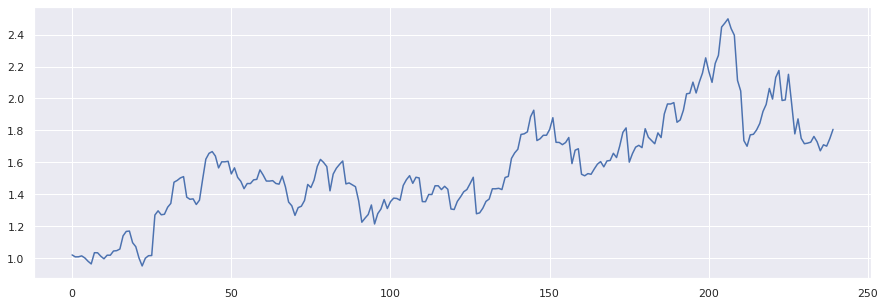

In [33]:
pd.Series(np.random.choice(both_ret_df['spy'], 12*20)).add(1).cumprod().plot();

In [34]:
def permute_columns(x):
    ix_i = np.random.sample(x.shape).argsort(axis=0)
    ix_j = np.arange(x.shape[1])
    return x[ix_i, ix_j]

def permute_rows(x):
    ix_i = np.arange(x.shape[0]).reshape(-1,1)
    ix_j = np.random.sample(x.shape).argsort(axis=1)
    return x[ix_i, ix_j]

def choose_rand_rows(x):
    ix_i = np.arange(x.shape[0]).reshape(-1,1)
    ix_j = np.random.randint(0, x.shape[1], size=x.shape)
    return x[ix_i, ix_j]

In [53]:
permuted_ret_diff_series_arr = permute_rows(
    np.tile(ret_diff_series, (100,1))
)
kirsh_rand_choice_series_arr = choose_rand_rows(
    np.tile(both_ret_df['kirsh'], (1_000,1))
)

spy_rand_choice_series_arr = choose_rand_rows(
    np.tile(both_ret_df['spy'], (1_000, 1))
)

In [54]:
kirsh_ret_bootstrap_no_replacement_df = pd.DataFrame(
    (permuted_ret_diff_series_arr + both_ret_df['spy'].values + 1).cumprod(1).T,
    index=both_ret_df.index)

In [57]:
kirsh_ret_bootstrap_replacement_df = pd.DataFrame(
    (kirsh_rand_choice_series_arr + 1).cumprod(1).T,
    index=both_ret_df.index)

spy_ret_bootstrap_replacement_df = pd.DataFrame(
    (spy_rand_choice_series_arr + 1).cumprod(1).T,
    index=both_ret_df.index
)

In [58]:
spy_final_ret = both_ret_df['spy'].add(1).cumprod()[-1]

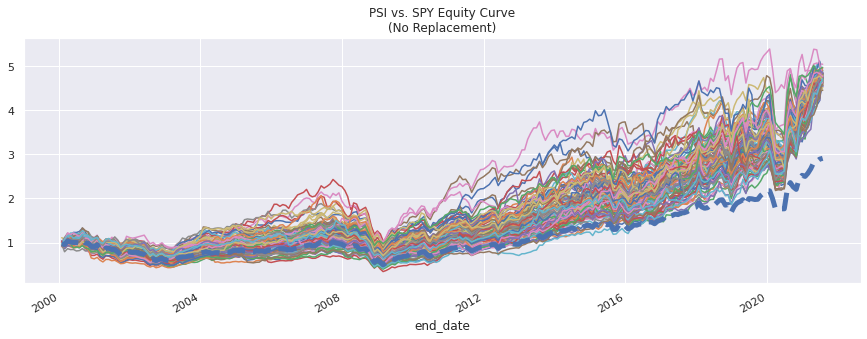

In [59]:
fig, ax = plt.subplots(1)

kirsh_ret_bootstrap_no_replacement_df.plot(ax=ax);
both_ret_df['spy'].add(1).cumprod().plot(style='--', linewidth=5, ax=ax, label=None)
ax.legend().remove()
ax.title.set_text('PSI vs. SPY Equity Curve\n(No Replacement)');

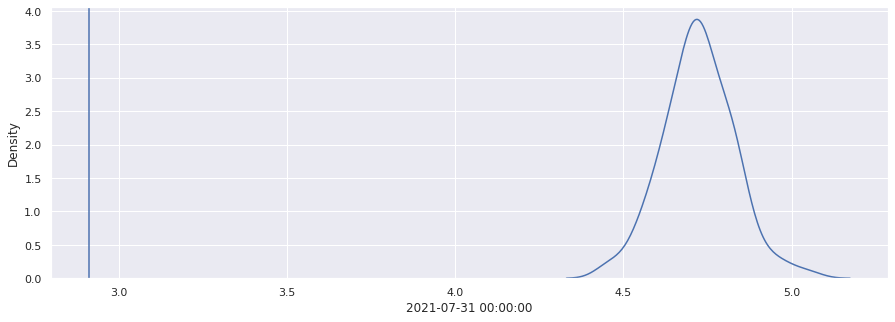

In [60]:
sns.kdeplot(kirsh_ret_bootstrap_no_replacement_df.iloc[-1])
plt.axvline(spy_final_ret);

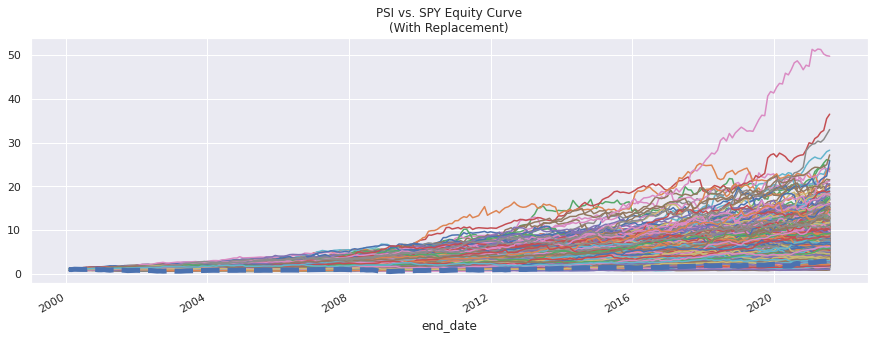

In [61]:
kirsh_ret_bootstrap_replacement_df.plot(legend=False);
both_ret_df['spy'].add(1).cumprod().plot(style='--', linewidth=5)
plt.title('PSI vs. SPY Equity Curve\n(With Replacement)');

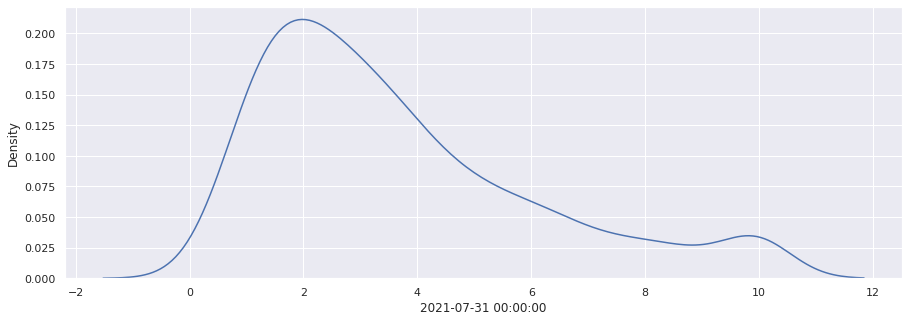

In [62]:
sns.kdeplot(
    spy_ret_bootstrap_replacement_df.iloc[-1]\
        .clip(0, 10),
#     bw_adjust=1.9,
    label='SPY with replacement'
);

In [63]:
spy_ret_bootstrap_replacement_df.iloc[-1].median(), kirsh_ret_bootstrap_replacement_df.iloc[-1].median()

(2.9940732132792776, 5.620667235724053)

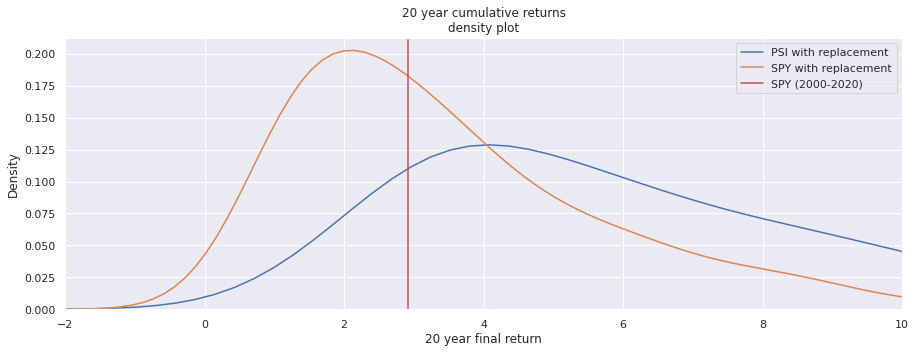

In [64]:
sns.kdeplot(
    kirsh_ret_bootstrap_replacement_df.iloc[-1]\
        .rename(),
    label='PSI with replacement'
)
sns.kdeplot(
    spy_ret_bootstrap_replacement_df.iloc[-1]\
        .rename(),
#     bw_adjust=1.9,
    label='SPY with replacement'
)

plt.xlim(-2,10)

plt.axvline(both_ret_df['spy'].add(1).cumprod()[-1], color='r', label='SPY (2000-2020)')
plt.title('20 year cumulative returns\ndensity plot')
plt.xlabel('20 year final return')
plt.legend();

<AxesSubplot:xlabel='end_date'>

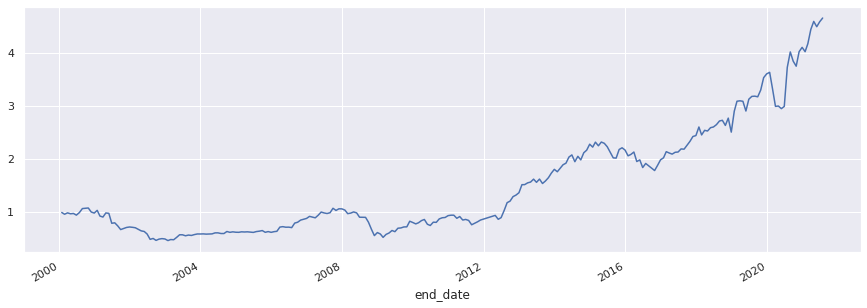

In [65]:
(pd.Series(
    np.random.permutation(ret_diff_series.values),
    index=ret_diff_series.index) + both_ret_df['spy']).add(1).cumprod().plot()

<AxesSubplot:xlabel='end_date'>

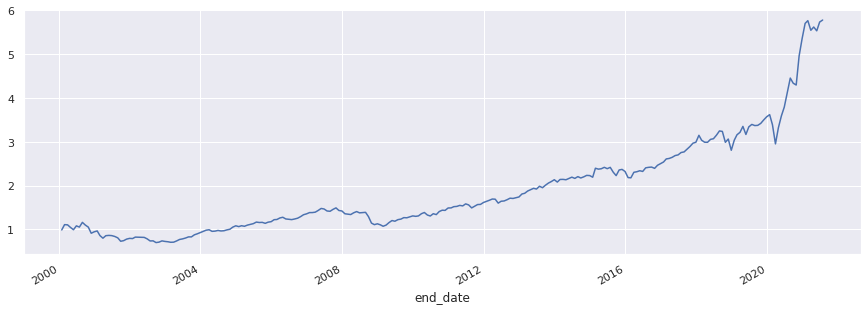

In [66]:
(ret_diff_series + both_ret_df['spy']).add(1).cumprod().plot()